# State Energy Profiles

Jinzhe Wang

3 September 2023

In [1]:
import geopandas

import matplotlib.pyplot as plt

states = geopandas.read_file("https://michaelminn.net/tutorials/data/2019-state-energy.geojson")

states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ST                               53 non-null     object  
 1   Name                             53 non-null     object  
 2   GEOID                            53 non-null     object  
 3   AFFGEOID                         53 non-null     object  
 4   Square.Miles.Land                53 non-null     float64 
 5   Square.Miles.Water               53 non-null     float64 
 6   State.Name                       51 non-null     object  
 7   Population.MM                    51 non-null     float64 
 8   Civilian.Labor.Force.MM          51 non-null     float64 
 9   GDP.B                            51 non-null     float64 
 10  GDP.Per.Capita                   51 non-null     float64 
 11  GDP.Manufacturing.MM             51 non-null     float64 
 12  Pe

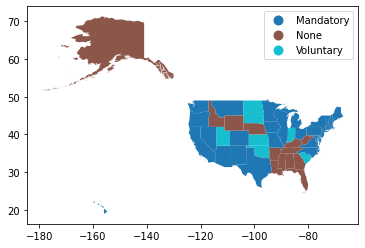

In [8]:
states.plot("Renewable.Standard.Type", legend=True)

plt.show()

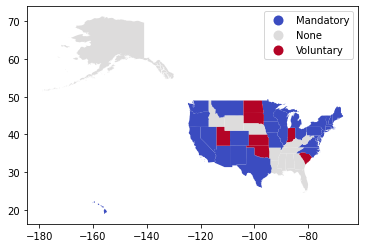

In [2]:
states.plot("Renewable.Standard.Type", legend=True, cmap="coolwarm")

plt.show()

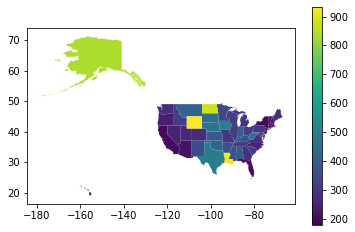

In [9]:
states.plot("Consumption.Per.Capita.MM.BTU", legend=True)

plt.show()

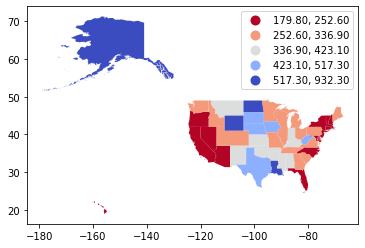

In [10]:
states.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap="coolwarm_r", scheme="naturalbreaks")

plt.show()

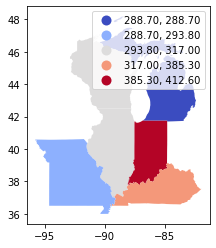

In [11]:
central = states[states.ST.isin( \
	['IL', 'WI', 'IN', 'MO', 'MI', 'IN', 'KY'])]

central.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap="coolwarm", scheme="naturalbreaks")

plt.show()

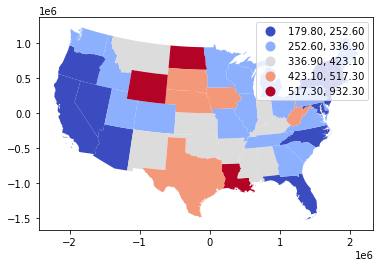

In [7]:
continental = states[~states.ST.isin(['AK', 'HI'])]

continental = continental.to_crs("ESRI:102009")

continental.plot("Consumption.Per.Capita.MM.BTU", legend=True, cmap="coolwarm", scheme="naturalbreaks")

plt.show()

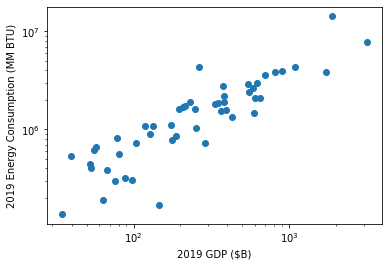

In [12]:
plt.scatter(states["GDP.B"], states["Consumption.Total.B.BTU"])
plt.ylabel("2019 Energy Consumption (MM BTU)")
plt.xlabel("2019 GDP ($B)")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [13]:
import statsmodels.api as sm

y = states["Consumption.Total.B.BTU"]

x = states[["GDP.B"]]

model = sm.OLS(y, x, missing="drop").fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Consumption.Total.B.BTU   R-squared (uncentered):                   0.783
Model:                                 OLS   Adj. R-squared (uncentered):              0.779
Method:                      Least Squares   F-statistic:                              180.7
Date:                     Mon, 04 Sep 2023   Prob (F-statistic):                    3.17e-18
Time:                             04:03:54   Log-Likelihood:                         -793.78
No. Observations:                       51   AIC:                                      1590.
Df Residuals:                           50   BIC:                                      1592.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP.B       3867.6266    287.741     13.441      0.000    3289.682    4445.571
==============================================================================
Omnibus:                       37.546   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.027
Skew:                           1.390   Prob(JB):                     2.17e-72
Kurtosis:                      15.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

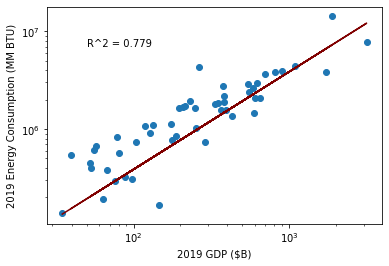

In [14]:
plt.scatter(states["GDP.B"], states["Consumption.Total.B.BTU"])

y_model = model.predict(x)

plt.plot(x, y_model, color="maroon")

plt.text(50, 7e6, "R^2 = " + str(round(model.rsquared_adj, 3)))
plt.ylabel("2019 Energy Consumption (MM BTU)")
plt.xlabel("2019 GDP ($B)")
plt.yscale("log")
plt.xscale("log")

plt.show()